## Validation of the instrumented math functions
We are evaluating the stability of sin() and cos() functions when instrumenting (1) the entire functions by recompiling OpenLibm library using Verificarlo, (2) the output of the functions using the wrapping technique.


In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np

def read_values(file_):
    with open(file_, 'r') as f:
        x = []
        for line in f.readlines():
            x.append(float(line))
        return x

def plot_instability(points, cos_, sin_):
    x = read_values(points)
    y_cos_53 = read_values(cos_)
    y_sin_53 = read_values(sin_)
    plt.plot(x, y_cos_53, '.', label='cos-mca')
    plt.plot(x, y_sin_53, '.', alpha=.8, label='sin-mca')
    plt.legend(loc='center right')
    plt.xlabel("Input points")
    plt.ylabel("Number of significant digits")
    plt.show()

Load result values from OpenLibm instrumentation:

In [2]:
points = './maths/points'
sigd_cos_53 = './maths/openlibm-cos-53'
sigd_sin_53 = './maths/openlibm-sin-53'


Plot the instability of sin() and cos() functions by instumenting the entire functions:

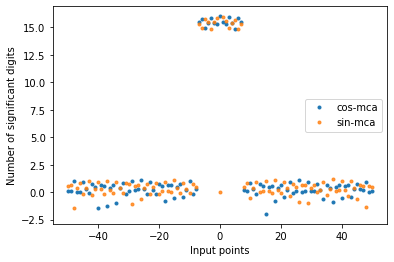

In [3]:
plot_instability(points, sigd_cos_53, sigd_sin_53)

Load result values from the wrapping technique:

In [6]:
sigd_cos_53 = './maths/wrapping-cos-53'
sigd_sin_53 = './maths/wrapping-sin-53'

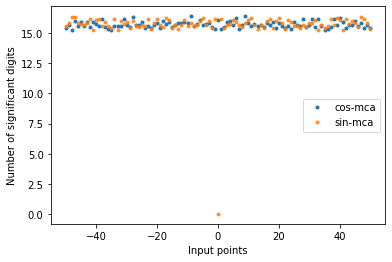

In [7]:
plot_instability(points, sigd_cos_53, sigd_sin_53)

## Instability of the registrations with FSL-FLIRT and FSL-FNIRT

In [8]:
import nibabel as nib
import numpy as np
from nilearn import plotting
import os
import matplotlib.pyplot as plt


def sigdig(im):
    dtype = im.get_data_dtype()
    if dtype in [np.int16, np.float16]:
        e_ = np.finfo(np.float16).eps
    else:
        e_ = np.finfo(np.float32).eps
    dat = im.get_fdata()
    sigs = -np.log2(np.std(dat, axis=3) / np.mean(dat, axis=3) + e_)
    sigs = np.nan_to_num(sigs)
    sigs[sigs < 0] == 0
    sig_image = nib.Nifti1Image(sigs, im.affine, im.header)
    return sig_image


def concat_images(input_imgs):
    images_ = []
    for img in os.listdir(input_imgs):
        images_.append(nib.load(os.path.join(input_imgs, img)))
        im = nib.funcs.concat_images(images_, check_affines=True, axis=None)
    return im

#### Calculating the significant digit values for FLIRT registration

In [9]:
input_imgs = "./flirt/"
im = concat_images(input_imgs)
sig_im = sigdig(im)
print(np.mean(sig_im.get_fdata()))


8.352347337684854


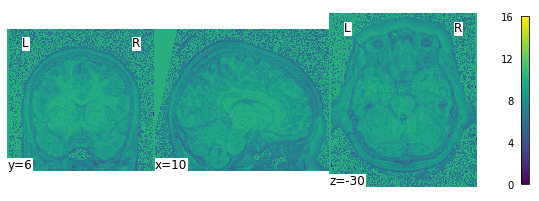

In [10]:
plotting.plot_img(sig_im, draw_cross=False, colorbar=True, cut_coords=[10, 6, -30], black_bg=False, vmin=0, vmax=16)
plotting.show()

#### Calculating the significant digit values for FNIRT registration

In [11]:
input_imgs = "./fnirt/"
im = concat_images(input_imgs)
sig_im = sigdig(im)
print(np.mean(sig_im.get_fdata()))

6.582936589222843


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log2
  from ipykernel import kernelapp as app


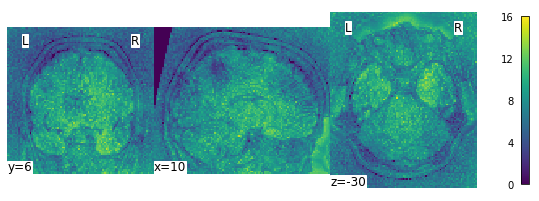

In [12]:
plotting.plot_img(sig_im, draw_cross=False, colorbar=True, cut_coords=[10, 6, -30], black_bg=False, vmin=0, vmax=16)
plotting.show()